## Image Classification using Logistic Regression in Pytorch

In [1]:
pip install --upgrade torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

## Exploring The Data

In [3]:
# Importing libraries
import torch
import torchvision
#from torchvision import MNI
import  torchvision.datasets as datasets

In [4]:
pip install torch==1.4.0+cu100 torchvision==0.5.0+cu100 -f

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\hp\anaconda3\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\hp\anaconda3\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\hp\anaconda3\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\hp\anaconda3\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\hp\anaconda3\python.exe -m pip install [options] <archive url/path> ...

-f option requires 1 argument


In [5]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [6]:
# download data 
dataset = datasets.MNIST(root = 'data/', download = True)

In [7]:
len(dataset)

60000

In [8]:
test_dataset = datasets.MNIST(root = 'data/', train = False)
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x23BDC8DBB50>, 5)

## Plotting Graph

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


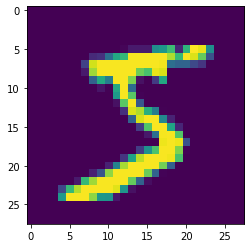

In [10]:
img , lbl = dataset[0]
plt.imshow(img)
print('Label:', lbl)

Label: 3


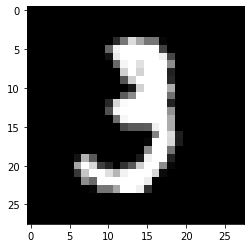

In [11]:
img , lbl = dataset[10]
plt.imshow(img,cmap='gray')
print('Label:', lbl)

### Pytorch doesnot know how to work with  images 

We need to convert the images into tensors

In [12]:
import torchvision.transforms as transforms

In [13]:
# MNSIT DATASET(images and labels)
dataset = datasets.MNIST(root ='data/', train = True, transform = transforms.ToTensor())

In [14]:
img_tensor , lbl = dataset[0]
print(img_tensor.shape, lbl)

torch.Size([1, 28, 28]) 5


## Training and Validation Datasets

1. Training set : Used to train the model
2. Training set : Used to Evaluate the model while training
3. Test set : Used to compare Different model 

In [15]:
import numpy as np
def split_ind(n,val):
    # set size of validation set
    n_val = int(val * n)
    # create random permutation of 0 to n-1
    idxs = np.random.permutation(n)
    return idxs[n_val:], idxs[:n_val]

In [16]:
train_ind , val_ind = split_ind(len(dataset), val = 0.2)

In [17]:
print(len(train_ind), len(val_ind))

48000 12000


In [18]:
print('sample:',val_ind[:20])

sample: [27471  9654 57021 59460 36025 25478 35720 43324 56012  8637 31515 10851
 45072 40310 24697 29787  6985 44235  8640 10391]


**We now create  pytorch data loaders for each of these using a "subsetrandomsample", which samples elements randomly from a given list of indices while greating batches of data**

In [19]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [20]:
batch_size = 100
# training sampler and data loader
train_sampler = SubsetRandomSampler(train_ind)
train_loader = DataLoader(dataset, batch_size, sampler=train_sampler)

In [21]:
# Validation sampler and data loader
val_samp = SubsetRandomSampler(val_ind)
val_loader = DataLoader(dataset, batch_size, sampler=val_samp)

## Model

- We can use nn.Linear to  create the model instead of defining and initilizing the matrices manually 

In [22]:
import torch.nn as nn

input_size = 28* 28
num_classes = 10
# logistic regression model 
model = nn.Linear(input_size, num_classes)

In [23]:
# weights and biases
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0288, -0.0216,  0.0290,  ...,  0.0147, -0.0134,  0.0133],
        [ 0.0063,  0.0325,  0.0061,  ...,  0.0224,  0.0348, -0.0145],
        [-0.0234, -0.0170, -0.0244,  ...,  0.0193, -0.0138,  0.0194],
        ...,
        [-0.0226,  0.0329, -0.0213,  ..., -0.0022, -0.0184, -0.0293],
        [-0.0171,  0.0316, -0.0339,  ...,  0.0295, -0.0203, -0.0040],
        [-0.0109,  0.0200,  0.0289,  ..., -0.0222,  0.0066,  0.0192]],
       requires_grad=True)

In [24]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0164,  0.0014,  0.0018, -0.0233, -0.0007,  0.0174,  0.0278, -0.0063,
        -0.0275,  0.0040], requires_grad=True)

**We take first batch of 100 images from our dataset, and pass them into our model**

In [25]:
for img, lbl in train_loader:
    print(lbl)
    print(img.shape)
    outputs = model(img)
    break
    

tensor([6, 5, 1, 6, 7, 3, 3, 6, 8, 8, 8, 1, 1, 1, 8, 9, 8, 8, 4, 5, 7, 5, 7, 2,
        2, 9, 7, 2, 8, 1, 7, 2, 9, 0, 3, 1, 7, 4, 7, 2, 6, 2, 6, 1, 3, 3, 1, 4,
        2, 7, 6, 8, 2, 3, 3, 2, 9, 2, 2, 1, 7, 2, 7, 3, 1, 5, 1, 5, 8, 2, 9, 9,
        6, 2, 7, 3, 2, 1, 5, 3, 8, 4, 4, 4, 1, 4, 6, 4, 4, 8, 0, 0, 7, 4, 5, 4,
        7, 7, 0, 0])
torch.Size([100, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2800x28 and 784x10)

- It seems that our training shape is not same so lets solve 

In [26]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out
model = MnistModel()

In [27]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0159,  0.0231,  0.0334,  ..., -0.0335,  0.0332, -0.0329],
         [-0.0132, -0.0281, -0.0149,  ..., -0.0209, -0.0156,  0.0313],
         [ 0.0111, -0.0353,  0.0191,  ...,  0.0184,  0.0065, -0.0058],
         ...,
         [-0.0027,  0.0174,  0.0071,  ...,  0.0048,  0.0213, -0.0241],
         [ 0.0232,  0.0180, -0.0091,  ..., -0.0225,  0.0047, -0.0355],
         [-0.0228, -0.0230, -0.0274,  ...,  0.0088, -0.0251, -0.0125]],
        requires_grad=True),
 Parameter containing:
 tensor([-1.1979e-02, -3.3908e-02, -6.4503e-05,  3.0590e-02, -2.0186e-02,
         -2.4779e-02, -2.9092e-02,  3.5431e-02, -2.2836e-02,  1.6756e-02],
        requires_grad=True)]

**Our new custom model can be used in the exact same way before . Lets see if it works**

In [28]:
for img , lbl in train_loader:
    outputs = model(img)
    break
print('outputs.shape: ', outputs.shape)
print('sample outputs:\n ', outputs[:2].data)



outputs.shape:  torch.Size([100, 10])
sample outputs:
  tensor([[-0.2191, -0.1782, -0.1468,  0.1968,  0.2130, -0.1443, -0.1483,  0.2601,
         -0.0407,  0.1600],
        [-0.0220,  0.2116, -0.0450,  0.6280, -0.0863, -0.0091, -0.1462, -0.0692,
          0.4427,  0.0117]])


In [29]:
import torch.nn.functional as F

**The softmax funcrtion is included in the torch.nn.functional package, and requires us to specify a dimension along which the softmax must be applied**

In [30]:
# Apply softmax for each output row 
probs = F.softmax(outputs, dim =1)
# sample
print("sample prob: \n", probs[:2].data)
# Add up probability
print('Sum: ', torch.sum(probs[0]).item())

sample prob: 
 tensor([[0.0794, 0.0827, 0.0853, 0.1203, 0.1223, 0.0856, 0.0852, 0.1282, 0.0949,
         0.1160],
        [0.0864, 0.1092, 0.0845, 0.1656, 0.0810, 0.0876, 0.0763, 0.0824, 0.1376,
         0.0894]])
Sum:  1.0


In [31]:
max_probs, preds = torch.max(probs,dim = 1)
print(preds)


tensor([7, 3, 3, 3, 9, 3, 2, 3, 3, 3, 1, 3, 3, 3, 4, 3, 3, 3, 1, 3, 3, 3, 7, 3,
        3, 3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 9, 3, 3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 9,
        3, 7, 3, 3, 3, 1, 3, 7, 9, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 8, 3, 3, 3, 3,
        3, 3, 7, 7, 3, 3, 3, 3, 8, 3, 3, 3, 3, 3, 7, 3, 3, 3, 3, 8, 3, 3, 4, 3,
        1, 7, 2, 4])


In [32]:
lbl

tensor([3, 4, 3, 4, 8, 9, 4, 6, 6, 5, 3, 2, 7, 7, 2, 0, 3, 2, 1, 5, 0, 2, 8, 8,
        6, 0, 6, 1, 6, 8, 2, 2, 4, 6, 9, 8, 8, 5, 0, 8, 4, 2, 8, 7, 7, 1, 9, 7,
        9, 1, 9, 4, 9, 3, 4, 2, 3, 4, 5, 3, 9, 7, 6, 0, 2, 7, 9, 7, 2, 2, 7, 6,
        2, 4, 1, 8, 7, 0, 6, 3, 7, 7, 6, 6, 5, 2, 1, 9, 2, 9, 7, 1, 6, 7, 3, 5,
        1, 8, 8, 4])

## Evaluation Metric and loss Function

In [33]:
def accuracy(l1,l2):
    return torch.sum(l1 == l2).item()/len(l1)

In [34]:
accuracy(preds, lbl)

0.07

Unlike accuracy , cross-entropy is a continuous and differentiable function that also provides good feedback for incremental improvements in the model .This makes a good choice for the loss function.

In [35]:
loss_fun = F.cross_entropy

In [37]:
# for current batch 
loss = loss_fun(outputs, lbl)
loss

tensor(2.3616, grad_fn=<NllLossBackward0>)

In [40]:
learning_rate = 0.001
opt = torch.optim.SGD(model.parameters(),lr= learning_rate)

## Training Model

- Now we have to define data loaders, moel , loss func and optimizer we are ready to train the model.

In [59]:
def loss_batch(model, loss_func, xb, yb, opt= None, metric = None):
    #calculate loss
    preds = model(xb)
    loss = loss_func(preds, yb)
    
    if opt is not None:
        # compute gradients 
        loss.backward()
        # update 
        opt.step()
        # reset
        opt.zero_grad()
        
    metric_res = None
    if metric is not None:
        # conpute metric
        metric_res = metric(preds,yb)
    return loss.item(), len(xb), metric_res

In [60]:
def evaluate(model, loss_fun,valid_dl, metric = None):
    with torch.no_grad():
        # pass eacg batch through model
        res = [loss_batch(model, loss_fun,xb,yb, metric = metric)
              for xb,yb in valid_dl]
        # separate 
        losses, nums,metrices = zip(*res)
        # Total size 
        total = np.sum(nums)
        # avg loss
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        avg_metric = None
        if metric is not None:
            avg_metric = np.sum(np.multiply(metrices, nums)) / total 
        return avg_loss ,total , avg_metric

In [61]:
def accuracy(outputs, lbl):
    _, preds = torch.max(outputs, dim = 1)
    return torch.sum(preds == lbl).item()/len(preds)

In [62]:
val_loss, total, val_acc = evaluate(model, loss_fun, val_loader, metric = accuracy)
print('Loss:{:.4f}, Acc :{:.4f}'.format(val_loss,val_acc))

Loss:2.3283, Acc :0.0841


**We can now define fit model  function quite easily using loss_batch and evaluate**

In [76]:
def fit(epochs , model , loss_fn, opt, train_dl, valid_dl, metric = None):
    for epoch in range(epochs):
        #Training
        for xb,yb in train_dl:
            loss, _,_ = loss_batch(model, loss_fn, xb, yb ,opt)
            # Evaluation 
            res = evaluate( model , loss_fn,  valid_dl, metric)
            val_loss , total, val_metric = res
            
            # progress
            if metric is not None:
                print('Epoch [{}/{}], loss:{:.4f}'.format(epoch+1, epochs, val_loss))
                
            else :
                print('Epoch [{}/{}], loss:{:.4f}, {}: {:.4f}'.format(epoch+1, epochs, val_loss), metric.__name__, val_metric)

In [77]:
# Redefine model 
model = MnistModel()
opt = torch.optim.SGD(model.parameters(),lr= learning_rate)

In [78]:
fit(5,model,F.cross_entropy,opt, train_loader, val_loader,accuracy)

Epoch [1/5], loss:2.2750
Epoch [1/5], loss:2.2739
Epoch [1/5], loss:2.2728
Epoch [1/5], loss:2.2718
Epoch [1/5], loss:2.2707
Epoch [1/5], loss:2.2696
Epoch [1/5], loss:2.2686
Epoch [1/5], loss:2.2676
Epoch [1/5], loss:2.2666
Epoch [1/5], loss:2.2656
Epoch [1/5], loss:2.2646
Epoch [1/5], loss:2.2636
Epoch [1/5], loss:2.2625
Epoch [1/5], loss:2.2613
Epoch [1/5], loss:2.2601
Epoch [1/5], loss:2.2591
Epoch [1/5], loss:2.2579
Epoch [1/5], loss:2.2571
Epoch [1/5], loss:2.2561
Epoch [1/5], loss:2.2550
Epoch [1/5], loss:2.2539
Epoch [1/5], loss:2.2528
Epoch [1/5], loss:2.2517
Epoch [1/5], loss:2.2507
Epoch [1/5], loss:2.2497
Epoch [1/5], loss:2.2486
Epoch [1/5], loss:2.2476
Epoch [1/5], loss:2.2464
Epoch [1/5], loss:2.2455
Epoch [1/5], loss:2.2445
Epoch [1/5], loss:2.2434
Epoch [1/5], loss:2.2424
Epoch [1/5], loss:2.2413
Epoch [1/5], loss:2.2404
Epoch [1/5], loss:2.2394
Epoch [1/5], loss:2.2384
Epoch [1/5], loss:2.2374
Epoch [1/5], loss:2.2364
Epoch [1/5], loss:2.2352
Epoch [1/5], loss:2.2342


Epoch [1/5], loss:1.9706
Epoch [1/5], loss:1.9698
Epoch [1/5], loss:1.9690
Epoch [1/5], loss:1.9682
Epoch [1/5], loss:1.9674
Epoch [1/5], loss:1.9667
Epoch [1/5], loss:1.9659
Epoch [1/5], loss:1.9650
Epoch [1/5], loss:1.9641
Epoch [1/5], loss:1.9632
Epoch [1/5], loss:1.9624
Epoch [1/5], loss:1.9616
Epoch [1/5], loss:1.9608
Epoch [1/5], loss:1.9600
Epoch [1/5], loss:1.9592
Epoch [1/5], loss:1.9583
Epoch [1/5], loss:1.9575
Epoch [1/5], loss:1.9567
Epoch [1/5], loss:1.9559
Epoch [1/5], loss:1.9551
Epoch [1/5], loss:1.9542
Epoch [1/5], loss:1.9534
Epoch [1/5], loss:1.9527
Epoch [1/5], loss:1.9519
Epoch [1/5], loss:1.9511
Epoch [1/5], loss:1.9503
Epoch [1/5], loss:1.9495
Epoch [1/5], loss:1.9488
Epoch [1/5], loss:1.9479
Epoch [1/5], loss:1.9471
Epoch [1/5], loss:1.9464
Epoch [1/5], loss:1.9456
Epoch [1/5], loss:1.9448
Epoch [1/5], loss:1.9441
Epoch [1/5], loss:1.9433
Epoch [1/5], loss:1.9425
Epoch [1/5], loss:1.9417
Epoch [1/5], loss:1.9409
Epoch [1/5], loss:1.9401
Epoch [1/5], loss:1.9393


KeyboardInterrupt: 

In [79]:
test_dataset = datasets.MNIST(root = 'data/', train = False,transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


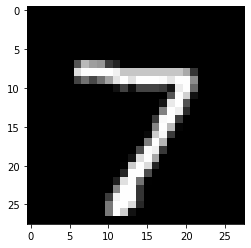

In [80]:
img,lbl = test_dataset[0]
plt.imshow(img[0],cmap='gray')
print('Shape:',img.shape)
print('Label:',lbl)

In [81]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [85]:
def predict_img(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim = 1)
    return preds[0].item()

label: 9 Predicted: 9


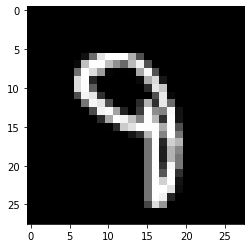

In [86]:
img, lbl = test_dataset[193]
plt.imshow(img[0],cmap='gray')
print('label:',lbl,'Predicted:',predict_img(img,model))